**Gradient Decent**

**Data Reading and Preparing**

In [17]:
#Read data
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
data = np.loadtxt('regression_x_t.txt')
m = len(data)
x = data[:,0]
x0 = np.full(m, 1.0) 
x2 = np.power(x,2)
x3 = np.power(x,3) 
X = np.vstack([x0,x,x2,x3]).T    
Y = data[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=30)
m_train = len(X_train)
m_test = len(X_test)
# print("X is", X.shape)
# print("m is", m_train)
# print("X_train is", X_train.shape)
# print(Y.shape)


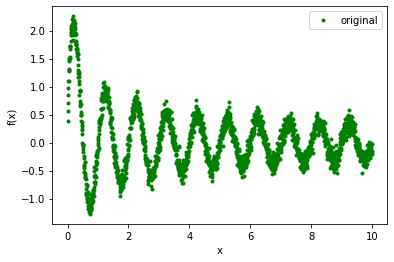

In [18]:
# Plot all the original data to see the distribution
import matplotlib.pyplot as plt
plt.plot(X.T[1],Y, "g.",label="original")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

**Batch Gradient Descent (Polynomial Linear Regression)**
1st order polynomial regression w_BGD_P1

In [19]:
#a) decressing of error function within increasing of interation 
#b) result coefficient w
#parameter
max_iter = 10000  #  The maximum number of iterations
w_BGD_P1 = np.random.randn(2) # initial the w
epsilon = 0.00001
step = 0.00001
count = 0
pre_w_BGD_P1 = np.zeros(2) 
X_train_1 = X_train[:,:2]
#print(X_train_1)
#iteration
while count < max_iter:
    count += 1
    sum_m = np.zeros(2)
    for i in range(m_train):  # sum gradient of every w
        diff = (np.dot(w_BGD_P1, X_train_1[i]) - Y_train[i]) * X_train_1[i]
        sum_m = sum_m + diff    
    w_BGD_P1 = w_BGD_P1 - step * sum_m
    if ((np.linalg.norm(w_BGD_P1 - pre_w_BGD_P1)) < epsilon):
        break
    else:
        rmseEachround = mean_squared_error(np.dot(X_test[:,:2],w_BGD_P1),Y_test,squared=False)
        print("interation count = %d"%count, "error = %f" %(np.linalg.norm(w_BGD_P1 - pre_w_BGD_P1)),"rmse = %f" %rmseEachround)
        pre_w_BGD_P1 = w_BGD_P1
print ('Total iteration = %d' % count,  '\tFinal w:[%f, %f]' % (w_BGD_P1[0], w_BGD_P1[1]))



interation count = 1 error = 0.669246 rmse = 3.111760
interation count = 2 error = 0.269555 rmse = 1.524875
interation count = 3 error = 0.125639 rmse = 0.857951
interation count = 4 error = 0.058595 rmse = 0.628261
interation count = 5 error = 0.027404 rmse = 0.567471
interation count = 6 error = 0.012976 rmse = 0.553735
interation count = 7 error = 0.006465 rmse = 0.550610
interation count = 8 error = 0.003778 rmse = 0.549630
interation count = 9 error = 0.002873 rmse = 0.549025
interation count = 10 error = 0.002627 rmse = 0.548460
interation count = 11 error = 0.002563 rmse = 0.547887
interation count = 12 error = 0.002541 rmse = 0.547306
interation count = 13 error = 0.002528 rmse = 0.546723
interation count = 14 error = 0.002518 rmse = 0.546140
interation count = 15 error = 0.002507 rmse = 0.545560
interation count = 16 error = 0.002497 rmse = 0.544983
interation count = 17 error = 0.002487 rmse = 0.544410
interation count = 18 error = 0.002478 rmse = 0.543841
interation count = 

interation count = 150 error = 0.001461 rmse = 0.496850
interation count = 151 error = 0.001455 rmse = 0.496651
interation count = 152 error = 0.001449 rmse = 0.496453
interation count = 153 error = 0.001443 rmse = 0.496258
interation count = 154 error = 0.001437 rmse = 0.496063
interation count = 155 error = 0.001432 rmse = 0.495871
interation count = 156 error = 0.001426 rmse = 0.495680
interation count = 157 error = 0.001420 rmse = 0.495490
interation count = 158 error = 0.001415 rmse = 0.495302
interation count = 159 error = 0.001409 rmse = 0.495116
interation count = 160 error = 0.001403 rmse = 0.494931
interation count = 161 error = 0.001398 rmse = 0.494748
interation count = 162 error = 0.001392 rmse = 0.494566
interation count = 163 error = 0.001387 rmse = 0.494386
interation count = 164 error = 0.001381 rmse = 0.494208
interation count = 165 error = 0.001376 rmse = 0.494031
interation count = 166 error = 0.001370 rmse = 0.493855
interation count = 167 error = 0.001365 rmse = 0

interation count = 308 error = 0.000776 rmse = 0.479663
interation count = 309 error = 0.000773 rmse = 0.479614
interation count = 310 error = 0.000770 rmse = 0.479566
interation count = 311 error = 0.000767 rmse = 0.479519
interation count = 312 error = 0.000764 rmse = 0.479472
interation count = 313 error = 0.000761 rmse = 0.479425
interation count = 314 error = 0.000758 rmse = 0.479379
interation count = 315 error = 0.000755 rmse = 0.479333
interation count = 316 error = 0.000752 rmse = 0.479288
interation count = 317 error = 0.000749 rmse = 0.479243
interation count = 318 error = 0.000746 rmse = 0.479199
interation count = 319 error = 0.000743 rmse = 0.479155
interation count = 320 error = 0.000740 rmse = 0.479111
interation count = 321 error = 0.000737 rmse = 0.479068
interation count = 322 error = 0.000734 rmse = 0.479026
interation count = 323 error = 0.000731 rmse = 0.478983
interation count = 324 error = 0.000728 rmse = 0.478941
interation count = 325 error = 0.000725 rmse = 0

interation count = 482 error = 0.000387 rmse = 0.475737
interation count = 483 error = 0.000385 rmse = 0.475730
interation count = 484 error = 0.000384 rmse = 0.475723
interation count = 485 error = 0.000382 rmse = 0.475716
interation count = 486 error = 0.000381 rmse = 0.475710
interation count = 487 error = 0.000379 rmse = 0.475703
interation count = 488 error = 0.000378 rmse = 0.475697
interation count = 489 error = 0.000376 rmse = 0.475691
interation count = 490 error = 0.000375 rmse = 0.475685
interation count = 491 error = 0.000373 rmse = 0.475678
interation count = 492 error = 0.000372 rmse = 0.475672
interation count = 493 error = 0.000370 rmse = 0.475667
interation count = 494 error = 0.000369 rmse = 0.475661
interation count = 495 error = 0.000367 rmse = 0.475655
interation count = 496 error = 0.000366 rmse = 0.475649
interation count = 497 error = 0.000364 rmse = 0.475644
interation count = 498 error = 0.000363 rmse = 0.475638
interation count = 499 error = 0.000361 rmse = 0

interation count = 654 error = 0.000194 rmse = 0.475418
interation count = 655 error = 0.000193 rmse = 0.475419
interation count = 656 error = 0.000193 rmse = 0.475420
interation count = 657 error = 0.000192 rmse = 0.475421
interation count = 658 error = 0.000191 rmse = 0.475422
interation count = 659 error = 0.000190 rmse = 0.475423
interation count = 660 error = 0.000190 rmse = 0.475424
interation count = 661 error = 0.000189 rmse = 0.475425
interation count = 662 error = 0.000188 rmse = 0.475426
interation count = 663 error = 0.000187 rmse = 0.475427
interation count = 664 error = 0.000187 rmse = 0.475428
interation count = 665 error = 0.000186 rmse = 0.475429
interation count = 666 error = 0.000185 rmse = 0.475430
interation count = 667 error = 0.000184 rmse = 0.475431
interation count = 668 error = 0.000184 rmse = 0.475432
interation count = 669 error = 0.000183 rmse = 0.475433
interation count = 670 error = 0.000182 rmse = 0.475434
interation count = 671 error = 0.000181 rmse = 0

interation count = 825 error = 0.000098 rmse = 0.475664
interation count = 826 error = 0.000098 rmse = 0.475666
interation count = 827 error = 0.000097 rmse = 0.475667
interation count = 828 error = 0.000097 rmse = 0.475669
interation count = 829 error = 0.000096 rmse = 0.475670
interation count = 830 error = 0.000096 rmse = 0.475672
interation count = 831 error = 0.000096 rmse = 0.475673
interation count = 832 error = 0.000095 rmse = 0.475675
interation count = 833 error = 0.000095 rmse = 0.475676
interation count = 834 error = 0.000095 rmse = 0.475678
interation count = 835 error = 0.000094 rmse = 0.475679
interation count = 836 error = 0.000094 rmse = 0.475681
interation count = 837 error = 0.000093 rmse = 0.475683
interation count = 838 error = 0.000093 rmse = 0.475684
interation count = 839 error = 0.000093 rmse = 0.475686
interation count = 840 error = 0.000092 rmse = 0.475687
interation count = 841 error = 0.000092 rmse = 0.475689
interation count = 842 error = 0.000092 rmse = 0

interation count = 975 error = 0.000054 rmse = 0.475867
interation count = 976 error = 0.000054 rmse = 0.475869
interation count = 977 error = 0.000053 rmse = 0.475870
interation count = 978 error = 0.000053 rmse = 0.475871
interation count = 979 error = 0.000053 rmse = 0.475872
interation count = 980 error = 0.000053 rmse = 0.475873
interation count = 981 error = 0.000052 rmse = 0.475874
interation count = 982 error = 0.000052 rmse = 0.475875
interation count = 983 error = 0.000052 rmse = 0.475876
interation count = 984 error = 0.000052 rmse = 0.475877
interation count = 985 error = 0.000052 rmse = 0.475879
interation count = 986 error = 0.000051 rmse = 0.475880
interation count = 987 error = 0.000051 rmse = 0.475881
interation count = 988 error = 0.000051 rmse = 0.475882
interation count = 989 error = 0.000051 rmse = 0.475883
interation count = 990 error = 0.000051 rmse = 0.475884
interation count = 991 error = 0.000050 rmse = 0.475885
interation count = 992 error = 0.000050 rmse = 0

interation count = 1129 error = 0.000029 rmse = 0.476006
interation count = 1130 error = 0.000029 rmse = 0.476007
interation count = 1131 error = 0.000029 rmse = 0.476007
interation count = 1132 error = 0.000029 rmse = 0.476008
interation count = 1133 error = 0.000029 rmse = 0.476009
interation count = 1134 error = 0.000028 rmse = 0.476009
interation count = 1135 error = 0.000028 rmse = 0.476010
interation count = 1136 error = 0.000028 rmse = 0.476011
interation count = 1137 error = 0.000028 rmse = 0.476011
interation count = 1138 error = 0.000028 rmse = 0.476012
interation count = 1139 error = 0.000028 rmse = 0.476013
interation count = 1140 error = 0.000028 rmse = 0.476013
interation count = 1141 error = 0.000028 rmse = 0.476014
interation count = 1142 error = 0.000028 rmse = 0.476015
interation count = 1143 error = 0.000027 rmse = 0.476015
interation count = 1144 error = 0.000027 rmse = 0.476016
interation count = 1145 error = 0.000027 rmse = 0.476017
interation count = 1146 error =

interation count = 1283 error = 0.000016 rmse = 0.476088
interation count = 1284 error = 0.000016 rmse = 0.476088
interation count = 1285 error = 0.000016 rmse = 0.476089
interation count = 1286 error = 0.000015 rmse = 0.476089
interation count = 1287 error = 0.000015 rmse = 0.476090
interation count = 1288 error = 0.000015 rmse = 0.476090
interation count = 1289 error = 0.000015 rmse = 0.476090
interation count = 1290 error = 0.000015 rmse = 0.476091
interation count = 1291 error = 0.000015 rmse = 0.476091
interation count = 1292 error = 0.000015 rmse = 0.476092
interation count = 1293 error = 0.000015 rmse = 0.476092
interation count = 1294 error = 0.000015 rmse = 0.476092
interation count = 1295 error = 0.000015 rmse = 0.476093
interation count = 1296 error = 0.000015 rmse = 0.476093
interation count = 1297 error = 0.000015 rmse = 0.476093
interation count = 1298 error = 0.000015 rmse = 0.476094
interation count = 1299 error = 0.000015 rmse = 0.476094
interation count = 1300 error =

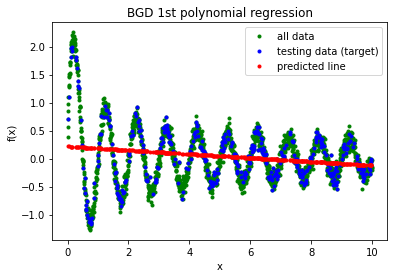

In [20]:
#c)Plot the predicted f(x) on testing data x within the actual target t on the same figure
import matplotlib.pyplot as plt
Y_predict = np.dot(X_test[:,:2],w_BGD_P1)
l_all = plt.plot(X.T[1],Y,"g.",label ="all data")
l_test = plt.plot(X_test.T[1],Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test.T[1],Y_predict,"r.", label = "predicted line")
plt.title("BGD 1st polynomial regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [21]:
#d)Root-Mean-Square Error of 1st Polynomial function 
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, Y_predict,squared=False)
print (rmse)

0.47612466651265895


**Batch Gradient Descent (3rd order Polynomial Regression)**
3rd order polynomial regression w_BGD_P1

Result: If we initial the w2 and w3 as 0, the regression will end in 3 iterations, which means the optimal solution of 1st order polynomial regression is still the global optimal of 3rd order polynomial regression. If we initial some random w, the gradient descent will end up at a local optimal that has a larger RMSE.

In [9]:
#a) decressing of error function within increasing of interation 
#b) result coefficient w
#parameter
max_iter = 100000  #  The maximum number of iterations
w_BGD_P3 = [0.217590, -0.033943, 0, 0]   # initial the w   
epsilon = 0.00001
step = 0.000000001
count = 0
pre_w_BGD_P3 = np.zeros(4) 
#iteration
while count < max_iter:
    count += 1
    sum_m = np.zeros(4)
    for i in range(m_train):  # sum gradient of every w
        diff = (np.dot(w_BGD_P3, X_train[i]) - Y_train[i]) * X_train[i]
        sum_m = sum_m + diff    
    w_BGD_P3 = w_BGD_P3 - step * sum_m
    if ((np.linalg.norm(w_BGD_P3 - pre_w_BGD_P3)) < epsilon):
        break
    else:
         rmseEachround = mean_squared_error(np.dot(X_test,w_BGD_P3),Y_test,squared=False)
         print("interation count = %d"%count, "error = %f" %(np.linalg.norm(w_BGD_P3 - pre_w_BGD_P3)), "rmse = %f" %rmseEachround)
         pre_w_BGD_P3 = w_BGD_P3
print ('Total iteration = %d' % count,  '\tFinal w:[%f, %f, %f, %f]' % (w_BGD_P3[0], w_BGD_P3[1], w_BGD_P3[2], w_BGD_P3[3]))


interation count = 1 error = 0.220222 rmse = 0.475935
interation count = 2 error = 0.000012 rmse = 0.475845
Total iteration = 3 	Final w:[0.217590, -0.033943, 0.000003, 0.000037]


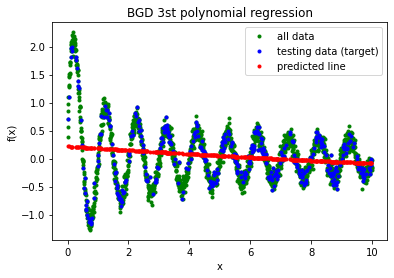

In [27]:
#c)Plot the predicted f(x) on testing data x within the actual target t on the same figure
import matplotlib.pyplot as plt
Y_predict = np.dot(X_test,w_BGD_P3)
l_all = plt.plot(X.T[1],Y,"g.",label ="all data")
l_test = plt.plot(X_test.T[1],Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test.T[1],Y_predict,"r.", label = "predicted line")
plt.title("BGD 3st polynomial regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [28]:
#d)Root-Mean-Square Error of 3st Polynomial function 
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, Y_predict,squared=False)
print (rmse)

0.4758103218871215


**Stochastic Gradient Descent (Linear Regression)**
1st order polynomial regression w_SGD_P1

In [30]:
#a) decressing of error function within increasing of used data points
#b) result coefficient w
max_iter = 100000  #  The maximum number of iterations
w_SGD_P1 = np.random.randn(2) # initial the w
epsilon = 0.00001
step = 0.00001
count = 0
pre_w_SGD_P1 = np.zeros(2) 
errorNorm = 0.0

#iteration
while count < max_iter:
    count += 1
    randomNum = np.random.randint(low = 0, high = m_train, size = None, dtype='l')
    diff = (np.dot(w_SGD_P1, X_train_1[randomNum]) - Y_train[randomNum]) * X_train_1[randomNum]   
    w_SGD_P1 = w_SGD_P1 - step * diff * m_train
    if np.linalg.norm(w_SGD_P1 - pre_w_SGD_P1) < epsilon:
        break
    else:
        rmseEachround = mean_squared_error(np.dot(X_test[:,:2],w_SGD_P1),Y_test,squared=False)
        print("interation count = %d"%count, "rmse = %f" %rmseEachround, )
        pre_w_SGD_P1 = w_SGD_P1
print ('Total iteration = %d' % count,  '\tFinal w:[%f, %f]' % (w_SGD_P1[0], w_SGD_P1[1]))


interation count = 1 rmse = 6.703881
interation count = 2 rmse = 4.053443
interation count = 3 rmse = 3.073153
interation count = 4 rmse = 3.156235
interation count = 5 rmse = 3.210085
interation count = 6 rmse = 1.426347
interation count = 7 rmse = 1.106290
interation count = 8 rmse = 0.747993
interation count = 9 rmse = 0.773811
interation count = 10 rmse = 0.791874
interation count = 11 rmse = 0.788672
interation count = 12 rmse = 0.575257
interation count = 13 rmse = 0.586789
interation count = 14 rmse = 0.577912
interation count = 15 rmse = 0.573994
interation count = 16 rmse = 0.590100
interation count = 17 rmse = 0.568659
interation count = 18 rmse = 0.570729
interation count = 19 rmse = 0.567262
interation count = 20 rmse = 0.620730
interation count = 21 rmse = 0.565555
interation count = 22 rmse = 0.569672
interation count = 23 rmse = 0.566418
interation count = 24 rmse = 0.582282
interation count = 25 rmse = 0.569358
interation count = 26 rmse = 0.608104
interation count = 27

interation count = 732 rmse = 0.551276
interation count = 733 rmse = 0.531464
interation count = 734 rmse = 0.536645
interation count = 735 rmse = 0.590050
interation count = 736 rmse = 0.571602
interation count = 737 rmse = 0.498629
interation count = 738 rmse = 0.526292
interation count = 739 rmse = 0.475352
interation count = 740 rmse = 0.476855
interation count = 741 rmse = 0.490880
interation count = 742 rmse = 0.630968
interation count = 743 rmse = 0.532776
interation count = 744 rmse = 0.546847
interation count = 745 rmse = 0.534682
interation count = 746 rmse = 0.566292
interation count = 747 rmse = 0.476332
interation count = 748 rmse = 0.510463
interation count = 749 rmse = 0.575171
interation count = 750 rmse = 0.491892
interation count = 751 rmse = 0.480985
interation count = 752 rmse = 0.475388
interation count = 753 rmse = 0.482263
interation count = 754 rmse = 0.479798
interation count = 755 rmse = 0.514939
interation count = 756 rmse = 0.503767
interation count = 757 rm

interation count = 1482 rmse = 0.476996
interation count = 1483 rmse = 0.534990
interation count = 1484 rmse = 0.562030
interation count = 1485 rmse = 0.516491
interation count = 1486 rmse = 0.491084
interation count = 1487 rmse = 0.519951
interation count = 1488 rmse = 0.537711
interation count = 1489 rmse = 0.552710
interation count = 1490 rmse = 0.608554
interation count = 1491 rmse = 0.517403
interation count = 1492 rmse = 0.582459
interation count = 1493 rmse = 0.539109
interation count = 1494 rmse = 0.563488
interation count = 1495 rmse = 0.477745
interation count = 1496 rmse = 0.529335
interation count = 1497 rmse = 0.494932
interation count = 1498 rmse = 0.477436
interation count = 1499 rmse = 0.489400
interation count = 1500 rmse = 0.581842
interation count = 1501 rmse = 0.481534
interation count = 1502 rmse = 0.504415
interation count = 1503 rmse = 0.490171
interation count = 1504 rmse = 0.498465
interation count = 1505 rmse = 0.566901
interation count = 1506 rmse = 0.543202


interation count = 2232 rmse = 0.568243
interation count = 2233 rmse = 0.505783
interation count = 2234 rmse = 0.477757
interation count = 2235 rmse = 0.561487
interation count = 2236 rmse = 0.630794
interation count = 2237 rmse = 0.629397
interation count = 2238 rmse = 0.484072
interation count = 2239 rmse = 0.590639
interation count = 2240 rmse = 0.584362
interation count = 2241 rmse = 0.490779
interation count = 2242 rmse = 0.503883
interation count = 2243 rmse = 0.485924
interation count = 2244 rmse = 0.521872
interation count = 2245 rmse = 0.566178
interation count = 2246 rmse = 0.669129
interation count = 2247 rmse = 0.554062
interation count = 2248 rmse = 0.579264
interation count = 2249 rmse = 0.572279
interation count = 2250 rmse = 0.542736
interation count = 2251 rmse = 0.520510
interation count = 2252 rmse = 0.477517
interation count = 2253 rmse = 0.492632
interation count = 2254 rmse = 0.512757
interation count = 2255 rmse = 0.517164
interation count = 2256 rmse = 0.549883


interation count = 2981 rmse = 0.509633
interation count = 2982 rmse = 0.584949
interation count = 2983 rmse = 0.477359
interation count = 2984 rmse = 0.487982
interation count = 2985 rmse = 0.494175
interation count = 2986 rmse = 0.602763
interation count = 2987 rmse = 0.542344
interation count = 2988 rmse = 0.520136
interation count = 2989 rmse = 0.569667
interation count = 2990 rmse = 0.710327
interation count = 2991 rmse = 0.480260
interation count = 2992 rmse = 0.549452
interation count = 2993 rmse = 0.608544
interation count = 2994 rmse = 0.494419
interation count = 2995 rmse = 0.482898
interation count = 2996 rmse = 0.502827
interation count = 2997 rmse = 0.575382
interation count = 2998 rmse = 0.492776
interation count = 2999 rmse = 0.485619
interation count = 3000 rmse = 0.487279
interation count = 3001 rmse = 0.482207
interation count = 3002 rmse = 0.476692
interation count = 3003 rmse = 0.557724
interation count = 3004 rmse = 0.615564
interation count = 3005 rmse = 0.572545


interation count = 3731 rmse = 0.511786
interation count = 3732 rmse = 0.475650
interation count = 3733 rmse = 0.528506
interation count = 3734 rmse = 0.481315
interation count = 3735 rmse = 0.478772
interation count = 3736 rmse = 0.558559
interation count = 3737 rmse = 0.485958
interation count = 3738 rmse = 0.503306
interation count = 3739 rmse = 0.626044
interation count = 3740 rmse = 0.661096
interation count = 3741 rmse = 0.707372
interation count = 3742 rmse = 0.524853
interation count = 3743 rmse = 0.509866
interation count = 3744 rmse = 0.514855
interation count = 3745 rmse = 0.476544
interation count = 3746 rmse = 0.475958
interation count = 3747 rmse = 0.535114
interation count = 3748 rmse = 0.620434
interation count = 3749 rmse = 0.581714
interation count = 3750 rmse = 0.613842
interation count = 3751 rmse = 0.480937
interation count = 3752 rmse = 0.488883
interation count = 3753 rmse = 0.579629
interation count = 3754 rmse = 0.476656
interation count = 3755 rmse = 0.480938


interation count = 4481 rmse = 0.511988
interation count = 4482 rmse = 0.508061
interation count = 4483 rmse = 0.477111
interation count = 4484 rmse = 0.500867
interation count = 4485 rmse = 0.489534
interation count = 4486 rmse = 0.476277
interation count = 4487 rmse = 0.480502
interation count = 4488 rmse = 0.484094
interation count = 4489 rmse = 0.490931
interation count = 4490 rmse = 0.478827
interation count = 4491 rmse = 0.551806
interation count = 4492 rmse = 0.552301
interation count = 4493 rmse = 0.478132
interation count = 4494 rmse = 0.484032
interation count = 4495 rmse = 0.496759
interation count = 4496 rmse = 0.477738
interation count = 4497 rmse = 0.476737
interation count = 4498 rmse = 0.498184
interation count = 4499 rmse = 0.477544
interation count = 4500 rmse = 0.477006
interation count = 4501 rmse = 0.479294
interation count = 4502 rmse = 0.520208
interation count = 4503 rmse = 0.480869
interation count = 4504 rmse = 0.479811
interation count = 4505 rmse = 0.482291


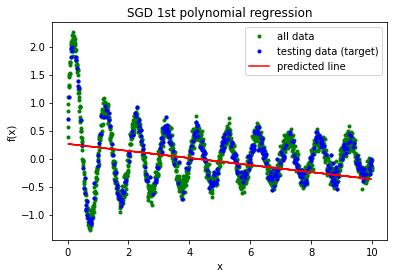

In [31]:
#c)Plot the predicted f(x) on testing data x within the actual target t on the same figure
Y_predict = np.dot(X_test[:,:2],w_SGD_P1)
l_all = plt.plot(X.T[1],Y,"g.",label ="all data")
l_test = plt.plot(X_test.T[1],Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test.T[1],Y_predict,"r", label = "predicted line")
plt.title("SGD 1st polynomial regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [32]:
#d)Root-Mean-Square Error of 1st Polynomial function 
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, Y_predict,squared=False)
print (rmse)

0.4992347076035778


**Stochastic Gradient Descent (Linear Regression)**
3rd order polynomial regression w_SGD_P3

In [33]:
#a) decressing of error function within increasing of used data points
#b) result coefficient w
max_iter = 100000  #  The maximum number of iterations
w_SGD_P3 = [0.12, -0.11, 0, 0] # initial the w
epsilon = 0.00001
step = 0.000000001
count = 0
pre_w_SGD_P3 = np.zeros(4) 
errorNorm = 0.0

#iteration
while count < max_iter:
    count += 1
    randomNum = np.random.randint(low = 0, high = m_train, size = None, dtype='l')
    diff = (np.dot(w_SGD_P3, X_train[randomNum]) - Y_train[randomNum]) * X_train[randomNum]   
    w_SGD_P3 = w_SGD_P3 - step * diff * m_train
    if np.linalg.norm(w_SGD_P3 - pre_w_SGD_P3) < epsilon:
        break
    else:
        rmseEachround = mean_squared_error(np.dot(X_test,w_SGD_P3),Y_test,squared=False)
        print("interation count = %d"%count, "rmse = %f" %rmseEachround, )
        pre_w_SGD_P3 = w_SGD_P3
print ('Total iteration = %d' % count,  '\tFinal w:[%f, %f, %f, %f]' % (w_SGD_P3[0], w_SGD_P3[1],w_SGD_P3[2], w_SGD_P3[3]))

interation count = 1 rmse = 0.527707
interation count = 2 rmse = 0.526059
interation count = 3 rmse = 0.526535
Total iteration = 4 	Final w:[0.120000, -0.109991, 0.000106, 0.001138]


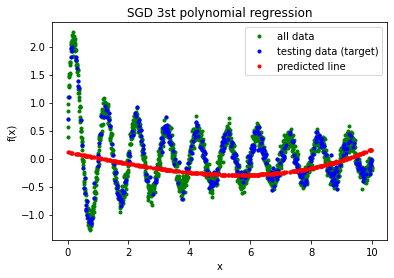

In [34]:
#c)Plot the predicted f(x) on testing data x within the actual target t on the same figure
Y_predict = np.dot(X_test,w_SGD_P3)
l_all = plt.plot(X.T[1],Y,"g.",label ="all data")
l_test = plt.plot(X_test.T[1],Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test.T[1],Y_predict,"r.", label = "predicted line")
plt.title("SGD 3st polynomial regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [35]:
#d)Root-Mean-Square Error of 1st Polynomial function 
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, Y_predict,squared=False)
print (rmse)

0.5265470158013116


**Maximum Likehood Algorithm**
${W^* = (X^T X)^(-1)X^T Y}$

**1st polynomial regression**

In [38]:
xMaL_1 = np.mat(X_train[:,:2])
yMaL_1 = np.mat(Y_train).T
xTx_1 = xMaL_1.T * xMaL_1
w_Max_1 = xTx_1.I * xMaL_1.T * yMaL_1
print('Final w is [%f,%f]'%(w_Max_1[0],w_Max_1[1]))

Final w is [0.220049,-0.034318]


BGD [0.217586, -0.033943]
SGD [0.127912, -0.011257]

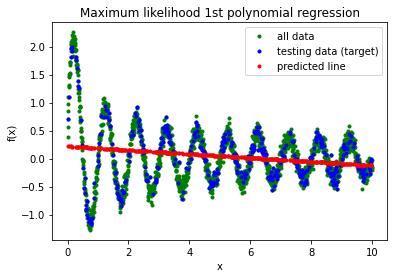

In [39]:
#c)Plot the predicted f(x) on testing data x within the actual target t on the same figure
Y_predict = np.dot(X_test[:,:2],w_Max_1)
l_all = plt.plot(X.T[1],Y,"g.",label ="all data")
l_test = plt.plot(X_test.T[1],Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test.T[1],Y_predict,"r.", label = "predicted line")
plt.title("Maximum likelihood 1st polynomial regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [40]:
#d)Root-Mean-Square Error of 1st Polynomial function 
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, np.squeeze(np.array(Y_predict.T)),squared=False)
print (rmse)

0.47619099631008505


BGD 0.4761245041967616
SGD 0.47805520244915833

**3rd polynomial regression**

In [41]:
xMaL = np.mat(X_train)
yMaL = np.mat(Y_train).T
xTx = xMaL.T * xMaL
w_Max = xTx.I * xMaL.T * yMaL
print('Final w is [%f,%f,%f,%f]'%(w_Max[0],w_Max[1],w_Max[2],w_Max[3]))

Final w is [0.838005,-0.632842,0.127952,-0.007558]


BGD [0.217590, -0.033943, 0.000003, 0.000037]
SGD [0.120007, -0.109972, 0.000182, 0.001317]

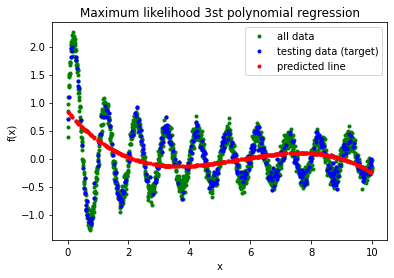

In [42]:
#c)Plot the predicted f(x) on testing data x within the actual target t on the same figure
Y_predict = np.dot(X_test,w_Max)
l_all = plt.plot(X.T[1],Y,"g.",label ="all data")
l_test = plt.plot(X_test.T[1],Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test.T[1],Y_predict,"r.", label = "predicted line")
plt.title("Maximum likelihood 3st polynomial regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [43]:
#d)Root-Mean-Square Error of 3rd Polynomial function 
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, np.squeeze(np.array(Y_predict.T)),squared=False)
print (rmse)

0.48303218888809946


BGD 0.4758103218871215
SGD 0.5250083161565475

**Gaussion Basis**

In [44]:
print(X_train[:,1])

[7.865 7.215 7.585 ... 4.71  2.11  9.15 ]


In [11]:
def gaussian_basis(x, mu, gamma=1):
    return np.exp(-gamma * np.linalg.norm(mu-x)**2)

M = 9
# Calculate design matrix Phi
Phi = np.ones((Y_train.shape[0], M))
for m in range(M-1):
    mu = m/M
    Phi[:, m+1] = np.vectorize(gaussian_basis)(X_train[:,1], mu)

# Calculate parameters w and alpha
w = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ Y_train
alpha = sum((Y_train - Phi @ w)**2) / len(Y_train)


In [12]:
#d)Root-Mean-Square Error 
from sklearn.metrics import mean_squared_error

Phi_t = np.ones((Y_test.shape[0], M))
for m in range(M-1):
    mu = m/M
    Phi_t[:, m+1] = np.vectorize(gaussian_basis)(X_test[:,1], mu)


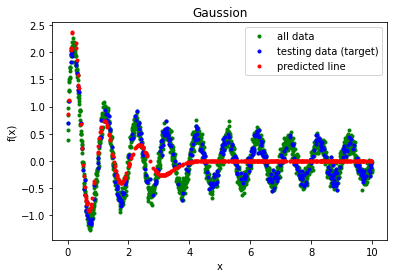

In [13]:
#c)Plot the predicted f(x) on testing data x within the actual target t on the same figure
Y_predict = Phi_t @ w
l_all = plt.plot(X.T[1],Y,"g.",label ="all data")
l_test = plt.plot(X_test.T[1],Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test.T[1],Y_predict,"r.", label = "predicted line")
plt.title("Gaussion")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [14]:
#root mean sqare error
rmse = mean_squared_error(Y_test, Phi_t @ w,squared=False)
print (rmse)

0.31892692192011113
